<a href="https://colab.research.google.com/github/Mounika0577/newrepository/blob/main/cifar100_ss2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchsummary
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

from tqdm.notebook import tqdm
import warnings

warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
#train transform
train_transform = transforms.Compose(
  [
   transforms.RandomResizedCrop(224),
   transforms.ToTensor(),
   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
  ]
)

#test transform
test_transform = transforms.Compose(
  [
   transforms.Resize(224),
   transforms.ToTensor(),
   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
  ]
)

In [ ]:
train_data = datasets.CIFAR100(
                      train=True,
                      download=True,
                      root='./data',
                      transform=train_transform
)

test_data = datasets.CIFAR100(
                      train=False,
                      download=True,
                      root='./data',
                      transform=test_transform
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = train_data.classes

print(len(classes))

print(classes)

100
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tr

In [ ]:
print("Train dataset size: ",len(train_data))
print("Test dataset size: ",len(test_data))

Train dataset size:  50000
Test dataset size:  10000


In [ ]:
train_loader = DataLoader(train_data,
                          batch_size=12,
                          shuffle=True)

print(len(train_loader))

4167


In [ ]:
test_loader = DataLoader(test_data,
                         batch_size=12,
                         shuffle=False)
print(len(test_loader))

834


In [ ]:
def show_images(imgs,title):
  imgs = imgs.cpu()
  mean = torch.tensor([0.485,0.456,0.406]).view(1,3,1,1)
  std = torch.tensor([0.229,0.224,0.225]).view(1,3,1,1)

  imgs = imgs *std + mean
  img_grid = torchvision.utils.make_grid(imgs,nrow=4)
  img_np = img_grid.numpy()
  img_np = np.transpose(img_np,(1,2,0))

  plt.figure(figsize=(8,4))
  plt.imshow(img_np)
  plt.title(title)
  plt.show()

Training Examples:


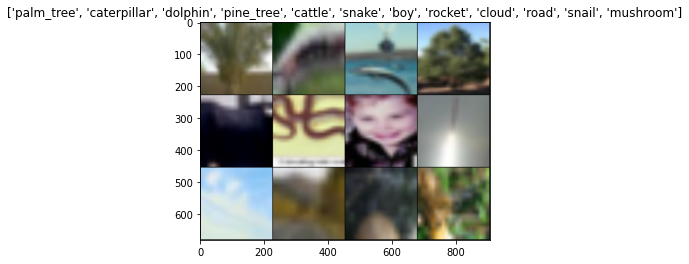

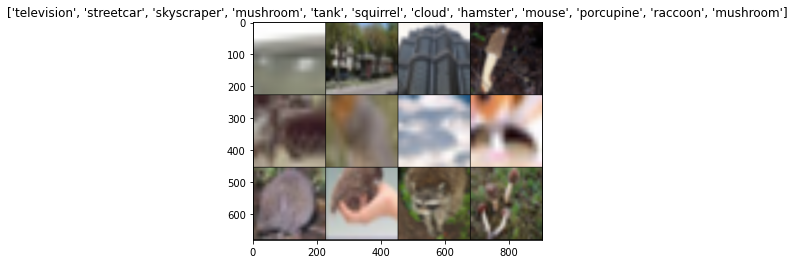

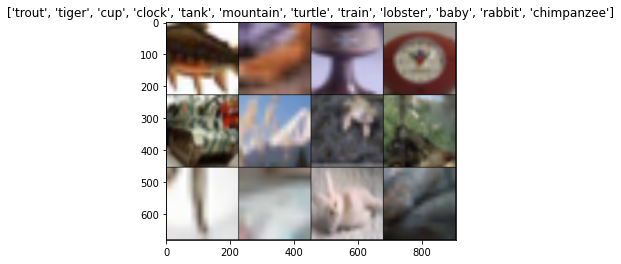

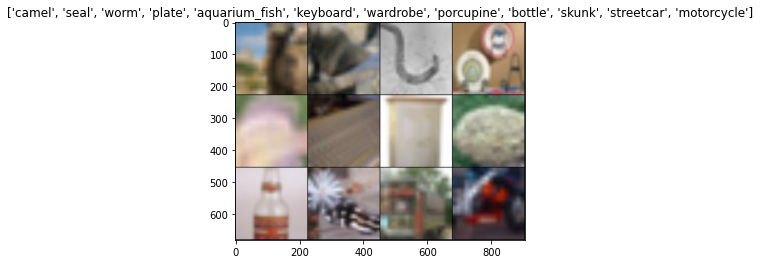

In [ ]:
print('Training Examples:')

for i,batch in enumerate(train_loader):
  if(i==4):
    break
  images,labels = batch
  show_images(images,str([classes[i] for i in labels]))


Test Examples:


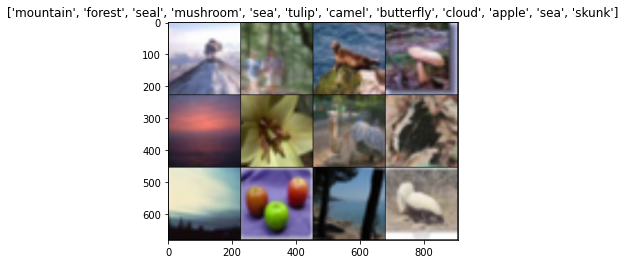

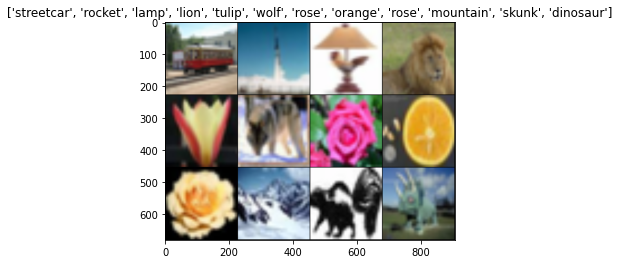

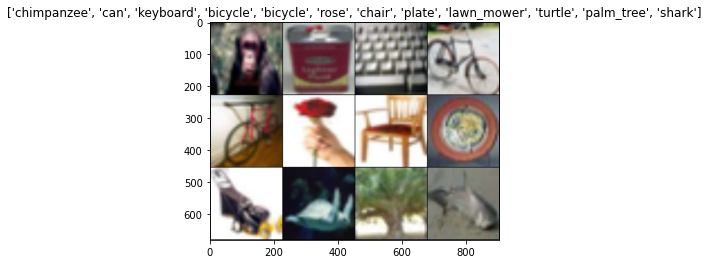

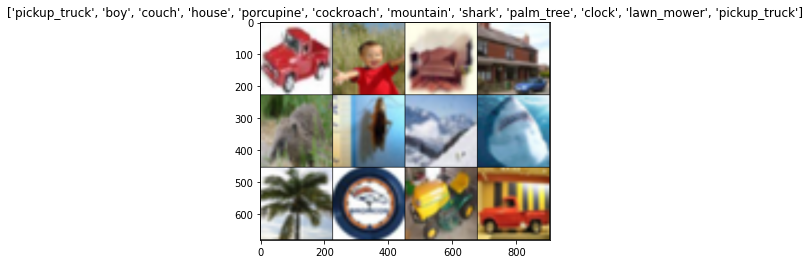

In [ ]:
print('Test Examples:')

for i,batch in enumerate(test_loader):
  if(i==4):
    break
  images,labels = batch
  show_images(images,str([classes[i] for i in labels]))

In [ ]:
#pre trained model
rsn=torchvision.models.resnet152(pretrained= True)

In [ ]:
rsn

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
torchsummary.summary(rsn.to(device),input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
rsn.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
in_features = rsn.fc.in_features
in_features

2048

In [ ]:
#modified output layer as follows:
modified_layer_fc=nn.Linear(in_features,100)
modified_layer_fc

Linear(in_features=2048, out_features=100, bias=True)

### Freezing  the layers

In [ ]:
#freezee the hidden layers
rsn.fc = modified_layer_fc

In [ ]:
rsn

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
rsn.parameters

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 2

In [ ]:
for param in rsn.parameters():
  param.requires_grad=False


In [ ]:
rsn.fc.parameters

<bound method Module.parameters of Linear(in_features=2048, out_features=100, bias=True)>

In [ ]:
for param in rsn.fc.parameters():
  param.requires_grad=True

In [ ]:
for param in rsn.parameters():
  if param.requires_grad==True:
    print(param.size())

torch.Size([100, 2048])
torch.Size([100])


## `Training`

In [ ]:
def evaluate(model,dataloader):
  total, correct=0,0

  #setting the model to 'EVAL' mode
  ##Turns OFF the BatchNorm and Dropout

  model.eval()

  for batch in dataloader:
    images, labels = batch
    images, labels = images.to(device), labels.to(device)

    outs = model(images)
    out_labels = torch.argmax(outs,axis=1)

    total+=labels.size(0)
    correct+=(labels==out_labels).sum().item()
  return 100* correct/total

In [ ]:
from google.colab import files


In [ ]:
#training with model checkpointing

import copy

def train(model, modelname, loss_fn, optimizer, train_loader,test_loader,epochs):

  hist={ 'epoch_loss':[],
        'train_acc': [],
        'test_acc': []
      
  }
  min_loss=10000
  for epoch in tqdm(range(1,epochs+1), total=epochs, desc='Training last layer'):

    losses=[] #store the loss value for each batch in this epoch

    ##start of epoch
    for batch in train_loader:
      images, labels=batch
      images, labels=images.to(device), labels.to(device)

      #setting the model to "train" mode
      ## Turns ON the BatchForm and Dropout
      model.train()

      #forward propagation
      outs = model(images)
      loss = loss_fn(outs,labels)

      #storing the loss value for each batch
      losses.append(loss.item())

      #back propagation
      optimizer.zero_grad()
      loss.backward()

      #update weights
      optimizer.step()

      #deleting
      del images,labels,outs
      torch.cuda.empty_cache()

      curr_epoch_loss = np.array(losses).mean()
      hist['epoch_loss'].append(curr_epoch_loss)
      hist['train_acc'].append(evaluate(model,train_loader))
      hist['test_acc'].append(evaluate(model,test_loader))


      if curr_epoch_loss< min_loss:
        min_loss = curr_epoch_loss
        best_model=copy.deepcopy(model.state_dict())
    fig, ax = plt.subplots(ncols=2,figsize=(12,6))

    ax[0].plot(range(1,epochs+1), hist['epoch_loss'], label='Loss')
    ax[0].plot(range(1,epochs+1), np.ones(epochs)*min_loss,'r--',alpha=0.6,label='Min Loss={}'.format(min_loss))
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].title('Epochs vs Loss')
    ax[0].grid()
    ax[0].legend()

    ax[1].plot(range(1,epochs+1), hist['train_acc'], 'b--',alpha=0.8, label='Train Accuracy')
    ax[1].plot(range(1,epochs+1), hist['test_acc'],'r--',alpha=0.8,label='Test Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy Score')
    ax[1].set_title('Epochs vs Accuracy Score')
    ax[1].grid()
    ax[1].legend()

    plt.plot()

    torch.save(best_model,'{0}_{1:.4f}.pth'.format(modelname, min_loss))
    print('Best loss value: {}'.format(minloss))

    files.download('{0}_{1:.4f}.pth'.format(modelname, min_loss))

    return best_model


In [ ]:
rsn = rsn.to(device)

In [ ]:
opt = torch.optim.Adam(rsn.parameters(),lr=0.001)

In [ ]:
loss_fn=nn.CrossEntropyLoss()

In [ ]:
rsn_wts = train(rsn,'rsn',loss_fn,opt,train_loader,test_loader,2)

Training last layer:   0%|          | 0/2 [00:00<?, ?it/s]

KeyboardInterrupt: ignored